# DAT561 Final Project 

#### NOTE: Please be creative in defining the new variables as part of the data manipulation and write your description at the end of each code as the comment. We will read your logic and description for the assessment.

In [1]:
import numpy as np
import pandas as pd

In [2]:
#read the dataset here
Property_details = pd.read_csv("Property_details.csv") # Please use your path and dataset for this parts!
Order_details = pd.read_csv("Order_details.csv")

## Question 1

#### Part (a): How many properties are there in the region with the zip code of 84100? 
#### Part (b): What is the mean, standard deviation, median, min, and max of “starratings” for all properties in the region with the zip code of 84100?


In [3]:
#(1a)
zipcode_84100 = Property_details[Property_details.zipcode == 84100]

count = zipcode_84100.shape[0]

count

52

In [4]:
#(1b)
zipcode_84100['starrating'].agg([np.mean,np.std,np.median,np.min,np.max])

mean      2.846154
std       0.751068
median    3.000000
amin      2.000000
amax      4.000000
Name: starrating, dtype: float64

## Question 2

 #### Part (a): Create a new column called "weekday", which is the day of the “reservation date” in one week (for example, if the reservation date is 2021/10/22, the corresponding value in the new column "weekday" should be “Friday”).
#### Part (b): Which "weekday" does receive the most reservation? 


In [5]:
#(2a)
Order_details['weekday'] = pd.to_datetime(Order_details['reservation date']).dt.day_name()
Order_details['weekday']

0         Saturday
1         Saturday
2           Friday
3         Saturday
4         Saturday
            ...   
165868     Tuesday
165869     Tuesday
165870     Tuesday
165871     Tuesday
165872     Tuesday
Name: weekday, Length: 165873, dtype: object

In [6]:
#(2b)
group_weekday = Order_details.groupby(by = 'weekday')['id'].count().reset_index()

group_weekday.columns = ['weekday', 'count']

most_weekday = max(group_weekday['count'])

group_weekday[group_weekday['count'] == most_weekday]

,weekday,count
4,Thursday,26589


## Question 3

#### Part (a): In “roomamenities”, what are the top 10 common room amenities? What about the 10 least common room amenities? ( for example, Air conditioning is one amenity)
#### Part (b): What percentage does each type of room amenities occupy of the total number of reservations for all properties?（do not use the total number of amenities as denominator）


In [7]:
# You can decide whether to display you output for 3(a) and 3(b) separately or together

amenities = Order_details['roomamenities'].astype('str').str.split(': ;').tolist()

amenities_count = {}

for line in amenities:
    line = line[:-1]
    for item in line:
        if item in amenities_count:
            amenities_count[item] +=1
        else:
            amenities_count[item] = 1


df_amenities_count = pd.DataFrame.from_dict(amenities_count, orient='index')
df_amenities_count.columns = ['count']

df_most_common = df_amenities_count.sort_values(by = 'count',ascending = False).iloc[:10,]
print(df_most_common)


                           count
Air conditioning          161054
In-room safe box          161054
Free Wi-Fi in all rooms!  157613
Hair dryer                127316
Toiletries                119993
Heating                   119196
Desk                      114593
Telephone                 113827
Closet                    113368
Towels                    106225


In [8]:
df_least_common = df_amenities_count.sort_values(by = 'count').iloc[:10,]
print(df_least_common)

                          count
Open air bath privileges     12
Hot tub                      13
Vending machine              24
Humidifier                   45
TV [in bathroom]             58
Internet access �?LAN        72
First aid kit                98
Air purifier                103
In-room tablet              161
Wi-Fi [free]                196


In [9]:
#3(b)
pd.set_option('display.max_rows', None)
total_reservations = Order_details.shape[0]
amenities_percentage = {}

for i in amenities_count:
    amenities_percentage[i] = round(amenities_count[i] / total_reservations,6)

df_amenities_per = pd.DataFrame.from_dict(amenities_percentage, orient='index')
df_amenities_per.columns = ['percentage']
df_amenities_per

,percentage
Air conditioning,0.970948
Alarm clock,0.240883
Carpeting,0.429178
Closet,0.683463
Coffee/tea maker,0.473748
Desk,0.690848
DVD/CD player,0.040585
Fan,0.122974
Free Wi-Fi in all rooms!,0.950203
Hair dryer,0.767551


## Question 4

#### Part (a): For each property, there are some abnormal values of 0 in the “onsiteprice”. To better organize the data, you would like to create a new column “replaced onsiteprice” in the dataset by retaining the original non-zero “onsiteprice” of one specific property and replacing the zero value with its median of non-zero “onsiteprice”.

#### Part (b): For each property, calculate the maximum and minimum value of “replaced onsiteprice”, and store these two into corresponding two columns named “Maximum” and “Minimum”. Then create a column named “Normalized Maximum” to store the normalized form of the “Maximum” column. You can use the formula below for the normalization (do not round the result). Store the “hotelcode”, “Maximum”, “Minimum”, “Normalized Maximum” to "Mx_Min Price.csv". 
$ X_{norm} = \frac{X-X_{min}}{X_\max-X_{min}}$

In [24]:
#4(a)
Order_details['replaced_onsiteprice'] = Order_details['onsiteprice'].copy()
nonzero_median = Order_details.loc[Order_details.onsiteprice != 0,:].groupby('propertycode')['onsiteprice'].median().reset_index()
nonzero_median.columns = ['propertycode','median_onsiteprice']

Order_details = Order_details.merge(nonzero_median, how = 'inner', on = 'propertycode')
Order_details.loc[Order_details.onsiteprice == 0, 'replaced_onsiteprice'] = Order_details.loc[Order_details.onsiteprice == 0, 'median_onsiteprice']

Order_details.drop('median_onsiteprice', inplace = True, axis = 1)

Order_details.head()

,id,propertycode,dtcollected,reservation date,los,guests,roomtype,onsiteprice,ratedescription,ratetype,...,closed,discount,promoname,proxyused,mealinclusiontype,hotelblock,input_dtcollected,weekday,replaced_onsiteprice,max_price
0,50677497,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,82.36,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,...,N,6.24,NaN,media:M3diAproxy@173.44.165.126:80,Free Breakfast,NaN,10/13/2019,Saturday,82.36,107.7
1,50677498,634876,10/12/2019 15:46,11/2/2019,1,1,Double Room,107.70,"Room size: 15 m²/161 ft², Shower, 1 king bed",Cancellation policy,...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
2,50677499,634876,10/12/2019 15:46,11/2/2019,1,1,Deluxe Double Room with Shower,107.70,"Room size: 17 m²/183 ft², Shower, 1 queen bed ...",Extra low price! (non-refundable),...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
3,50731279,634876,10/12/2019 15:46,11/2/2019,1,1,Superior Double Room,107.70,"Room size: 17 m²/183 ft², Shower, 1 double bed",Cancellation policy,...,N,0.00,NaN,media:M3diAproxy@173.44.165.126:80,Free breakfast for {2},NaN,10/13/2019,Saturday,107.70,107.7
4,63480999,634876,10/12/2019 18:52,10/15/2019,1,1,Standard Double or Twin Room,82.36,"Room size: 13 m²/140 ft², Shower, 1 queen bed ...",Extra low price! (non-refundable),...,N,6.24,NaN,media:M3diAproxy@107.158.217.250:80,Free Breakfast,NaN,10/13/2019,Tuesday,82.36,107.7


In [1]:
#4(b)

max_min = Order_details.groupby('propertycode')['replaced_onsiteprice'].agg([np.max,np.min]).reset_index()
max_min.columns = ['hotelcode','Maximum','Minimum']
max_max = max(max_min['Maximum'])
min_max = min(max_min['Maximum'])
max_min['Normalized_Maximum'] = (max_min['Maximum'] - min_max) / (max_max - min_max)

max_min.to_csv('Mx_Min Price.csv')

NameError: name 'Order_details' is not defined

## Question 5

#### Part (a): A family of three is planning a trip. How many available hotels do offer a room with the “maxoccupancy” of 3 or more? Available hotel are those whose “propertype” are “Hotels”, “close” are “N”, and “hotelblock” are not “sold out” .
#### Part (b): If this family does not want to pay a room for a “replaced onsiteprice” higher than 150 per night, how many hotels are still available? Use the maximum of “replaced onsiteprice” to compare with 150 due to price fluctuation. 


In [26]:
#5(a) 
df_hotels = Property_details.loc[(Property_details.propertytype == 'Hotels'),:]

Order_details['max_price'] = Order_details.groupby('propertycode')["replaced_onsiteprice"].transform(lambda x:x.max())

df_orders = Order_details.loc[(Order_details.maxoccupancy >=3) & \
                             (Order_details.closed == 'N') & \
                             (Order_details.hotelblock != 'Sold out' )]

df1 = df_hotels.merge(df_orders, how = "inner", left_on="propertyid", right_on  = "propertycode")

df2 = df1.drop_duplicates('propertycode')

len(df2)


3085

In [13]:
#5(b)

df3 = df2.loc[df2.max_price <= 150,:]

len(df3)


1372

## Bonus Question (merge data, filter, groupby, merge three times)
####  Part (a): For each country, find the most expensive property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.
#### Part (b): For each country, find the cheapest property by using “replaced onsiteprice”. Provide id, name, city, country, zip code, address, and average “replaced onsiteprice” of these properties.

#### Hint: Each country has numbers of hotels, and each hotel has numbers of prices due to price fluctuation. You need to find the average “replaced onsiteprice” for each hotel first, and sort out the cheapest and the most expensive hotels then.



In [14]:
#(a) 
df_a = Property_details.merge(Order_details, how = 'inner', left_on = 'propertyid', right_on = 'propertycode')

df_a['average_price'] = df_a.groupby('propertyid')["replaced_onsiteprice"].transform(lambda x:x.mean())
df_a = df_a.loc[:,['propertyid','propertyname','city','country','zipcode','address','average_price']]

df_a.sort_values('average_price',ascending=False).groupby('country',as_index=False).first()

,country,propertyid,propertyname,city,zipcode,address,average_price
0,Austria,130055,Superior Alpine Wellnesshotel Karwendel,Pertisau,6213.0,Nr. 54a,655.020000
1,Belgium,49541,Hotel Roosendaelhof,Geel,2440.0,Stationsstraat 50,403.902979
2,Bulgaria,7503033,Aspen Golf and Ski Resort,Razlog,2760.0,Betolovoto Aspen Golf,1072.850000
3,Croatia,112561,Hotel Marmont - Adults Only,Split,21000.0,Zadarska 13,920.066216
4,Cyprus,152681,Hilton Park Nicosia Hotel,Egkomi,5296.0,"1 Achaion Street,",304.798466
5,Czech Republic,367192,Hotel Bila Ruze,Strakonice,38601.0,Palackeho Namesti 80,676.515714
6,Denmark,6720996,The Square,Copenhagen,1560.0,Radhuspladsen 14,288.985946
7,Estonia,2202,Radisson Blu Sky Hotel Tallinn,Tallinn,10143.0,Ravala Street 3,200.326364
8,Finland,365601,HavsVidden Resort,Geta,22340.0,Havsviddsvagen 90,512.370000
9,France,442720,Hotel Astrid,Lourdes,65100.0,Place Merlasse,11367.060000


In [15]:
#(b) 
df_a.sort_values('average_price',ascending=True).groupby('country',as_index=False).first()

,country,propertyid,propertyname,city,zipcode,address,average_price
0,Austria,6537481,Dolomitenhotel,Lienz,9900.0,2 Dolomitenstrasse,12.060000
1,Belgium,174732,Hotel Royal Astrid,Aalst,9300.0,Keizersplein 27,54.589286
2,Bulgaria,449128,Family Hotel Natalis,Hisarya,4180.0,20 Geo Milev Str.,18.826667
3,Croatia,1177961,The Movie Hotel Zagreb,Zagreb,10000.0,Savska cesta,41.282000
4,Cyprus,184567,Bellapais Monastery Village,Ozankoy,9944.0,Bellapais Yolu Girne,35.880769
5,Czech Republic,390933,Hotel Praded Jesenik,Jesenik,79001.0,Dukelska 178,14.800000
6,Denmark,6629907,Zleep Hotel Aarhus Nord,Aarhus,8200.0,Tangen 45,58.844000
7,Estonia,7621602,ibis Tallinn Center,Tallinn,10132.0,Juhkentali 28,84.365714
8,Finland,887106,Kempeleen Moottorimaja,Kempele,90440.0,Sohjanantie 3,51.378571
9,France,7600445,Studio Moncoeur,Le Blanc,36300.0,31 Rue du Docteur Fardeau,33.150000


## Part 2 (9 Points):

For this part, we look at the logic and how you solve the problems. 

***Part 2-a:*** 

    1- You need to find "5" interesting business questions based on the datasets.     
    2- Write Python code to answer the questions.    
    3- Visualize your results. 
    

***Part 2-b:***

    Write a 300-word summary of your answers and business insights you get from answering these 5 questions based on your code. Ensure that you have clearly explained why we should care about your questions and your results. Clearly explain your findings.   

***This part will be evaluated based on the following criteria:***

    1. You need to ask five business-relevant questions. (2 points)
    2. You need to answer these five questions using Python and the datasets. (2 points)
    3. You need to have at least "5" graphs to visualize your insights. (2 points)
    4. Your executive summary of your answers is well-written and makes sense. (2 points)
    5. Your business insights are very interesting and the report is creative. (1 points)


**(You need to use this cell to write your 5 questions)**

**Question 1: Find top 10 countries with most hotels, whose "propertytype" are "Hotels", "close" are "N",and “hotelblock” are not “sold out”.

**Question 2: Which month has the most reservations?

**Question 3: how many days people usually make their reservation in advance?

**Question 4: For each country, what is the percentage of hotels for each starrating?

**Question 5: For the 4-star property, what is the maximum and minimum price in different countries?


In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.style.use('ggplot')


[Text(0.5, 1.0, 'Top 10 countries with most hotels'),
 Text(0.5, 0, 'country'),
 Text(0, 0.5, 'number')]

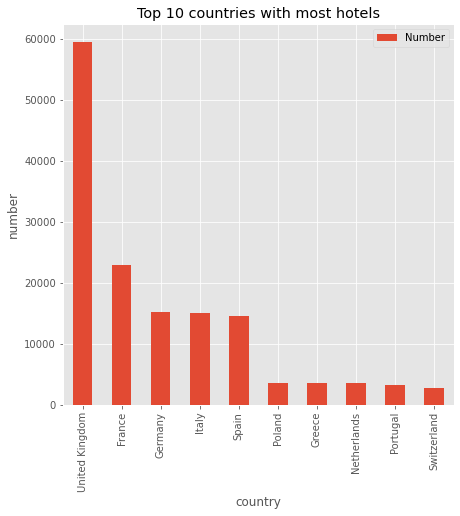

In [17]:
# Your code to answer Question 1
Available=Order_details.merge(Property_details,how="left",left_on="propertycode",right_on="propertyid").loc[:,["propertycode","country","propertyid","propertytype","hotelblock","closed","replaced_onsiteprice"]]
Available=Available.loc[(Available.propertytype=="Hotels")&(Available.closed=="N")&(Available.hotelblock!="Sold out"),:]
Available.drop_duplicates(subset=["propertycode"])
Hotel_num=Available.groupby('country').size().reset_index(name ='Number')
Hotel_country=Hotel_num.sort_values(["Number"],ascending=False)

top_10=Hotel_country.head(10)
fig,ax=plt.subplots(figsize=[7,7])
top_10.plot(kind='bar',x="country",y="Number",ax=ax)
ax.set(title="Top 10 countries with most hotels" , xlabel="country",ylabel="number")

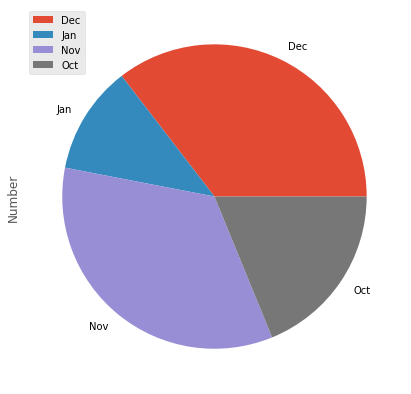

In [18]:
# Your code to answer Question 2
Available["month"]=pd.to_datetime(Order_details['reservation date']).dt.strftime('%b')
month_num=Available.groupby('month').size().reset_index(name ='Number')
Reservation_month=month_num.sort_values(["Number"],ascending=False)
Reservation_month
plot = Reservation_month.groupby(['month']).sum().plot(kind='pie', y='Number',figsize=(7, 7))

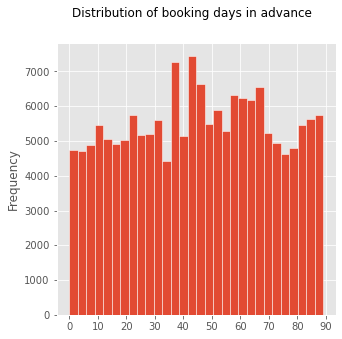

In [29]:
# Your code to answer Question 3
df_b1 = Order_details.loc[:,['reservation date','input_dtcollected']]
total_reservation = len(df_b1)
df_b1[['reservation date','input_dtcollected']] = df_b1[['reservation date','input_dtcollected']].apply(pd.to_datetime) 
df_b1['day_advance'] = (df_b1['reservation date'] - df_b1['input_dtcollected']).dt.days

fig, ax = plt.subplots(figsize = (5,5))
fig.suptitle("Distribution of reservation days ahead of check-in")

df_b1.day_advance.plot(kind = "hist", bins = 30, edgecolor = "white", ax = ax)

ax.set_xticks([0,10,20,30,40,50,60,70,80,90])



(0.0, 0.7)

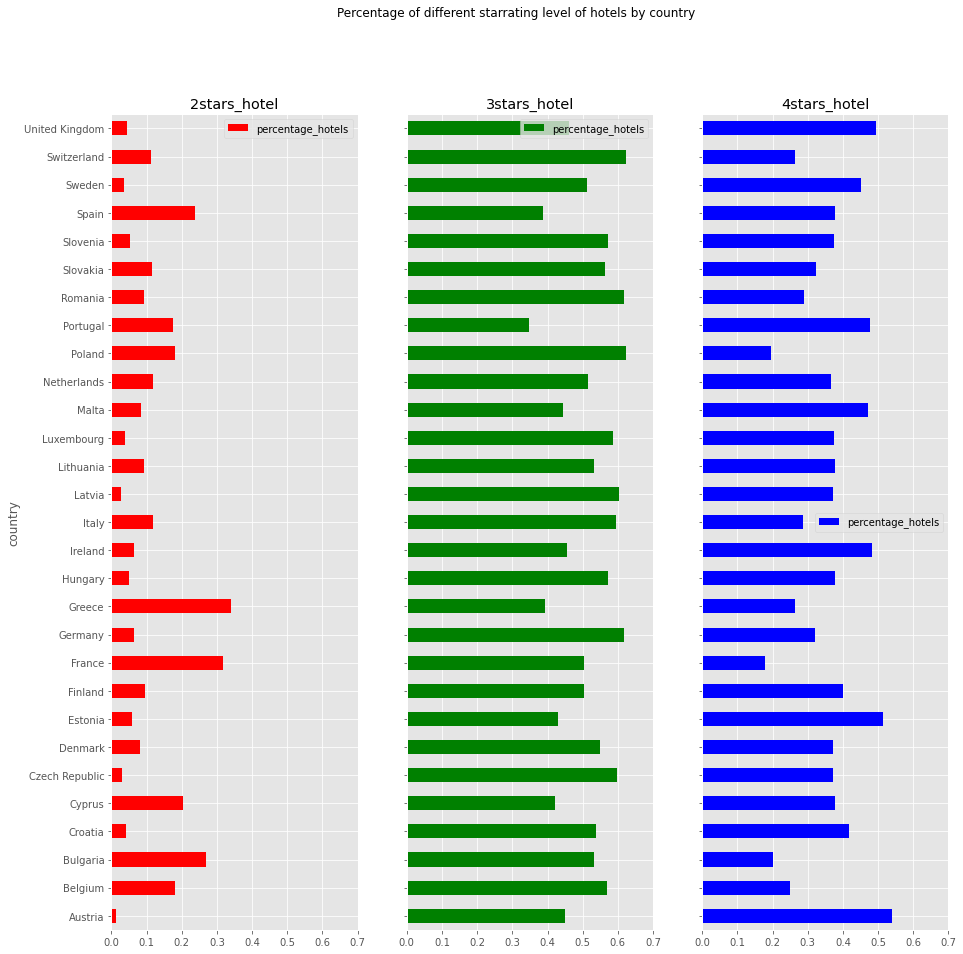

In [39]:
# Your code to answer Question 4

##get the total number of hotels by country
df_country = Property_details.loc[Property_details['propertytype'] == 'Hotels', :].groupby('country').propertyid.count().reset_index()
df_country.columns = ['country', 'num']

#get the total number of hotels in terms of country and starrating
df_b2 = Property_details.loc[Property_details['propertytype'] == 'Hotels', :].groupby(['country', 'starrating']).propertyid.count().reset_index()
#merge the two dataframes created below
df_b2 = df_b2.merge(df_country, how = 'inner', on = 'country')
#calculate the percentage (i.e. percentage of 2-stars hotels in country A = number of 2-stars hotels in country A/ total number of hotels in country A)
df_b2['num'] = df_b2.propertyid / df_b2.num
df_b2.columns = ['country','starrating','num_hotels','percentage_hotels']

#create different dataframe for different starratings
df_b2_2star = df_b2.loc[df_b2['starrating'] == 2,:]
df_b2_3star = df_b2.loc[df_b2['starrating'] == 3,:]
df_b2_4star = df_b2.loc[df_b2['starrating'] == 4,:]

#plot
fig, (ax0, ax1, ax2) = plt.subplots(nrows =1, ncols =3, sharey = True, figsize = (15,15)) 
fig.suptitle("Percentage of different starrating level of hotels by country")

df_b2_2star.plot(kind = "barh", x = "country", y = "percentage_hotels", color = "r", ax = ax0)
ax0.set(title = "2stars_hotel")
ax0.set_xlim([0,0.7])

df_b2_3star.plot(kind = "barh", x = "country", y = "percentage_hotels", color = "g", ax = ax1)
ax1.set(title = "3stars_hotel")
ax1.set_xlim([0,0.7])

df_b2_4star.plot(kind = "barh", x = "country", y = "percentage_hotels", color = "b", ax = ax2)
ax2.set(title = "4stars_hotel")
ax2.set_xlim([0,0.7])



In [42]:
# Your code to answer Question 5

##get all the 4stars places 
df_4star = Property_details.loc[(Property_details['propertytype'] == 'Hotels')&(Property_details['starrating'] == 4),['propertyid','country','starrating']]
##extract the property code and price
df_4star_price = Order_details.loc[:,['propertycode', 'replaced_onsiteprice']]
##get the average price of each hotel
df_4star_price_avg = df_4star_price.groupby('propertycode')['replaced_onsiteprice'].mean().reset_index()
##merge the 4star properties and their average price
df_4star = df_4star.merge(df_4star_price_avg, how = 'inner', left_on = 'propertyid', right_on = 'propertycode')
##drop the duplicate propertycode
df_4star = df_4star.loc[:, ['propertyid','country','starrating','replaced_onsiteprice']]
##rename the columns
df_4star.columns = ['propertyid','country','starrating','avg_onsiteprice']
##get the maximum and minimum average price by country
df_4star_country = df_4star.groupby('country')['avg_onsiteprice'].agg([np.max,np.min]).reset_index()


Text(0.5, 1.0, 'The maximum and minimum of the average price by country')

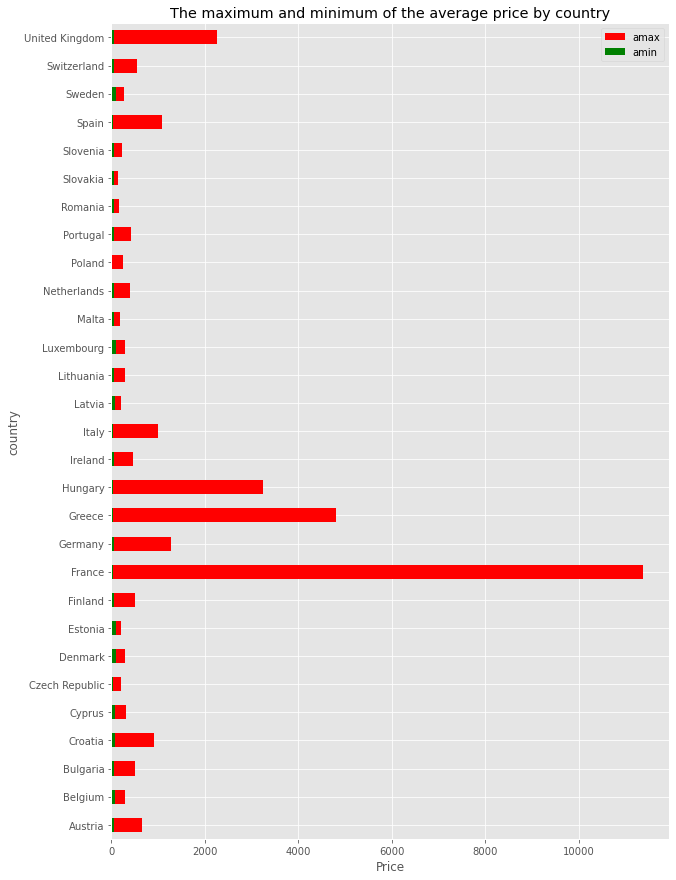

In [43]:
#continuing Question 5

##plot
fig, ax = plt.subplots(figsize = (10,15)) 

df_4star_country.plot(kind = "barh", x = "country", y = "amax", color = "r", ax = ax)

df_4star_country.plot(kind = "barh", x = "country", y = "amin", color = "g", ax = ax)

ax.set_xlabel('Price')

ax.set_title('The maximum and minimum of the average price by country')


Text(0.5, 1.0, 'The maximum and minimum of the average price by country (without France)')

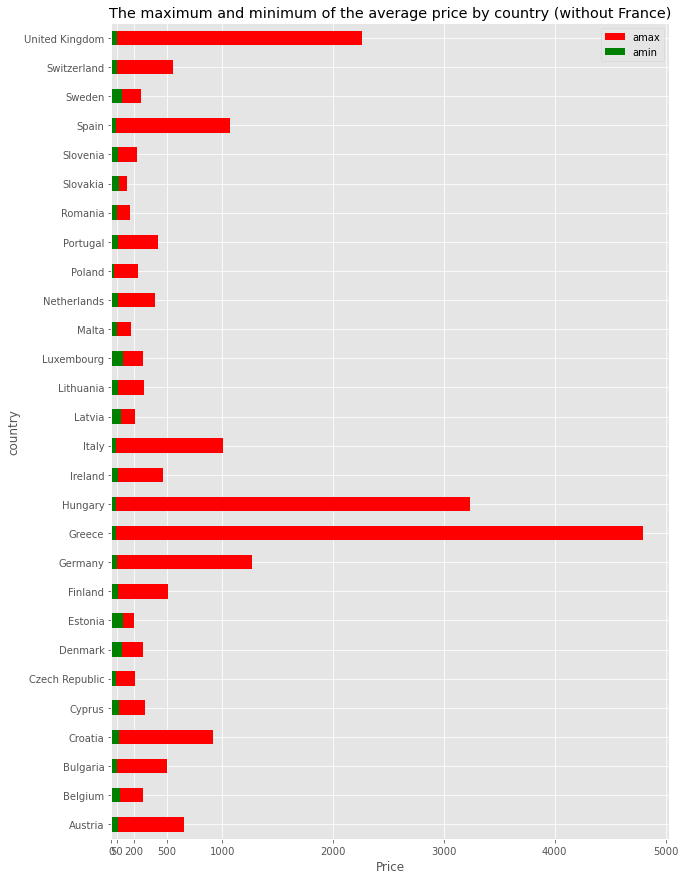

In [45]:
#continuing Question 5

##we can learn from the previous graph that the maximum price of France is an outlier, lets drop it and get a better graph without it
df_4star_country1 = df_4star_country.drop(index=9)  ##drop France

fig, ax = plt.subplots(figsize = (10,15)) 

df_4star_country1.plot(kind = "barh", x = "country", y = "amax", color = "r", ax = ax)

df_4star_country1.plot(kind = "barh", x = "country", y = "amin", color = "g", ax = ax)

ax.set_xlabel('Price')
ax.set_xticks([0,50,200,500,1000,2000,3000,4000,5000])

ax.set_title('The maximum and minimum of the average price by country (without France)')


## Executive Summary & Business insights:


**(You need to use the cell below to write your executive summary & business insights)**
Note: If you need more space use enter to go to the next line.


##### Executive Summary & Business insights:

Question1: Most hotels are in the UK, France, Germany, Italy, and Spain. Especially the UK dominates the market with 60,000+ hotels. Therefore, if any company want to open a hotel in those countries, it must realize that UK has a very mature and competitive market, and France, Germany, Italy and Spain have mature and less competitive market. 

Question2: Only four months of order data are recorded in this dataset. From this chart, we learn that November and December contribute most of the reservations, and this situation might result from thanksgiving and Christmas. Therefore, hotels can plan ahead for November and December to improve the overall efficiency, in terms of hotel supplies and personnel arrangement etc.

Question3: We learn that all the reservations are made within 90 days; most reservations are made during 40 - 70 days before; people still make reservation within 40 days before, and less people make reservation 70 days more before. Based on this finding, hotels can forecast the upcoming demand within 90 days and adjust their operation correspondingly.

Question 4: We learn that 3-star hotels dominate the market, 4-star hotels follow, and 2-star hotels are less than those two in most of the countries. We might conclude that people are willing to pay more for the hotels nowadays. However, from other perspective, it might be because those 3-star and 4-star hotels has larger profit-margin, which makes them easier to survive in the market.

Question 5: Although they are all 4-star hotels, the prices still vary a lot. There is a very expensive hotel in France (10000+), and some less expensive in the UK, Hungary, and Greece. Except those, some of the maximum prices fall between 500 and 1000, and the majority falls below 500. Most of the minimum prices are around 50. It should give a good insight of the pricing strategy in the hotel industry.


PART 1 - Question Points: 
1a - 2 points;
1b - 1 point;
2a - 3 points;
2b - 2 points;
3a - 3 points;
3b - 1 point;
4a - 3 points;
4b - 4 points;
5a - 3 points;
5b - 3 points;
Bonus(a) - 1 point;
Bonus(b) - 1 point;

PART 2 - 
9 points total


Good Luck!